# Homework 2: The discovery of Neptune

### Deadline: Monday Oct 1st 2018, 12:00

##### Please send the finished notebook +  html/pdf version of it to h.w.de.vries@rug.nl and h.jafarinia@rug.nl 

##### The homework will be graded on a pass/fail basis; in order to pass, you need to demonstrate a working code that displays the correct orbits both planets, and which clearly displays perturbation of the angular velocity of Uranus due to the presence of Neptune.

##### You might find that sections 9.6 and (especially) 9.7 constitute some helpful reading

The planet Uranus was discovered in 1781 by William Herschel and found to have an orbital period of approximately 84 years. By the year 1846, Uranus had just about completed a full orbit around the sun since its discovery, but did not seem to be following precisely the positions predicted by Newton’s law of gravity. However, theoretical calculations indicated that if there was a yet-to-be-discovered planet lying about 50% further away from the sun than Uranus, then its perturbation on the orbit of Uranus could explain the disagreement with Newton’s law. The planet Neptune was thus discovered theoretically and confirmed experimentally. (If Pluto is discarded as just a dwarf planet, then Neptune is the most distant planet in the solar system.)

Assume that the orbits of Neptune and Uranus are circular and coplanar (as shown in the example output in section 9.7), and that the initial angular positions with respect to the $x$-axis are as given in the below table.


|         | Mass (x10E-5 solar Masses) | Distance (AU) | Orbital Period (years) |  Angular position (in 1690) |
|---------|----------------------------|---------------|------------------------|-----------------------------|
|  Uranus | 4.36624                    | 19.1914       | 84.0110                | 205.640                     |
| Neptune | 5.151389                   | 30.0611       | 164.7901               | 288.380                     |

Using these data, your goal is to find the angular velocity of Uranus with respect to the Sun as a result of the influence of Neptune during one complete orbit of Neptune. Consider only the forces of the Sun and Neptune on Uranus. In astronomical units, $M_s = 1$ and $G = 4\pi^2$.

## Programming tasks and questions:

1. This problem technically is a 'three body problem', where Newton's law of gravitation:
$$ F^{\mathrm{g}}=-\frac{GmM}{r^2},$$
with $r$ the distance between a planet and the center of mass (approximately coincides with the sun in our case), $G$ the universal gravitational constant and $m$ and $M$ the masses of a planet and the sun, respectively, can be decomposed into   force functions. Note, however, that since the sun is significantly heavier than both planets, that we do not update the position of the sun at all. This gives us the following equations to solve:

$$  \vec{F_{\mathrm{i,j}}}=\frac{-GM_{\mathrm{i}}M_{\mathrm{j}}}{ \vec{ r_{\mathrm{i,j}}} \cdot \vec{ r_{\mathrm{i,j}}} } \frac{\vec{r_{\mathrm{i,j}}}}{|\vec{r_{\mathrm{i,j}}}|}\,,$$

where $F$ is the force, $G$ the gravitational constant, $M_i$ the mass of planet $i$, and $\vec{r_{i,j}}$ the distance between the two bodies. 
We have pre-defined a function _ftotal_ for you. The function takes the position of Neptune, the radial position and an index (i) that denotes which of the planets is considered, and returns the forces on Neptune and Uranus, respectively. You are asked to complete the force calculation, by taking the above formula, and applying it in order to:

 - Calculate the force between Uranus and the sun,
 
 - Calculate the force between Neptune and the Sun,
 
 - Calculate the force between Neptune and Uranus,
 
 - Calculate the force between Uranus and Neptune (i.e. use Newton's third law),
 
 - Find the total forces on Uranus and Neptune,
 

and then return either the total force of Uranus or Neptune, based on the value of $i$ that was provided.

2. You will be using the above force functions to evaluate the Rk4-algorithm for both Neptune and Uranus separately. You can use a modified Rk4 algorithm to this end, of which we will write the rules below for the case of Uranus (for Neptune, you will update the positions $\vec{r_{\mathrm{n,u}}}$ with the $\vec{k_{i}}$-values instead!):

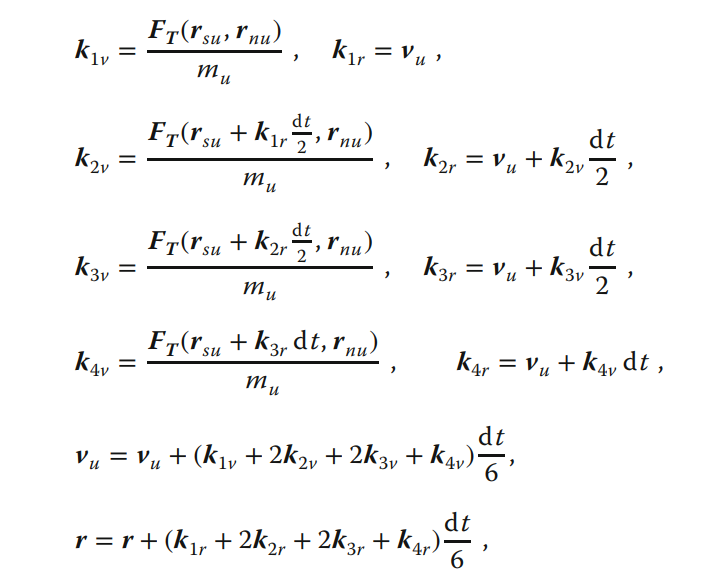



3. Test the code for appropriate step sizes $dt$. Run the code and display the angular velocity as a function of time; how big is the effect of the presence of Neptune on the orbit of uranus?

In [ ]:
""" 
In the below program, the influence of Neptune on the orbit of Uranus is calculated.
Please note: 'ur' indicates 'uranus', and 'np' indicates 'neptune'.

Good luck!
"""


#import routines, plotting purposes (ignore)
from vpython import * 
import numpy as np   
scene1=canvas()             
scene=canvas(width=600,height=600,  title= 'Model solar system', range=40)
sun = sphere(pos=vector(0,0,0), radius=2, color=color.yellow)
escenau=graph(x=600,width=400,height=400, title='Angular velocity (and perturbation thereof)')
graphu=gcurve(color=color.cyan)
escenan=graph(x=800,y=400,width=400,height=400)
graphn=gcurve(color=color.white)


#Here, we define some constants, and the masses of the planets + sun:
rfactor=1.8e-9
G=4*pi*pi         
M=1.0                   
mUranus=4.366244e-5    
mNeptune=5.151389e-5    

#distances uranus -> sun, neptune -> sun
distUrSun=19.1914        
distNeptSun=30.0611        


# Orbital periods T (in years)
periodUranus=84.0110       
periodNeptune=164.7901      

#angular velocities (2pi/T)
angVelUr=2*pi/periodUranus    
angVelNept=2*pi/periodNeptune   
angVelReal=angVelUr

#orbital velocity (in AU/year)
urVelocity=2*pi*distUrSun/periodUranus    
neptVelocity=2*pi*distNeptSun/periodNeptune    


# Insert the angular position in 1690 below in radUranus and radNeptune and decompose the initial angular positions
# into x- and y coordinates for both planets, which then are translated into velocities.

radUranus=(205.64)*pi/180.  
urXcoord=distUrSun*cos(radUranus)       
urYcoord=distUrSun*sin(radUranus)       
urVelocityX=urVelocity*sin(radUranus)
urVelocityY=-urVelocity*cos(radUranus)
 
radNeptune=(288.38)*pi/180. 
neptXcoord=distNeptSun*cos(radNeptune)       
neptYcoord=distNeptSun*sin(radNeptune)       
neptVelocityX=neptVelocity*sin(radNeptune)
neptVelocityY=-neptVelocity*cos(radNeptune)






""" The below lines are for plotting the forces between Neptune and Uranus, and vice versa (i.e. forceNeptUr and
    forceUrNept). You can leave a trail behind a moving object in the graphical output by simply by specifying 
    make_trail=True. For example each time you change urpert.pos, this new position is added to a curve, thereby leaving 
    a trail behind the moving sphere. Moreover, the force fectors for uranus and neptune are plotted in real-time."""
uranus=sphere(pos=vector(urXcoord,urYcoord,0), radius=0.5,color=vector(.88,1,1), make_trail=True)    
urpert=sphere(pos=vector(urXcoord,urYcoord,0), radius=0.5,color=vector(.88,1,1), make_trail=True)
forceNeptUr=arrow(pos=uranus.pos,color=color.orange,axis=vector(0,4,0))
neptune=sphere(pos=vector(neptXcoord,neptYcoord,0), radius=0.4,color=color.cyan, make_trail=True)
forceUrNept=arrow(pos=neptune.pos,color=color.orange,axis=vector(0,-4,0))
nppert=sphere(pos=vector(neptXcoord,neptYcoord,0), radius=0.4,color=color.white, make_trail=True)


#Initial positions, velocities
initVelocityUr=vector(urVelocityX,urVelocityY,0)   
initVelocityNept=vector(neptVelocityX,neptVelocityY,0)    
posUrSun=vector(urXcoord,urYcoord,0)           # initial position Uranus wrt Sun
posNeptSun=vector(neptXcoord,neptYcoord,0)         # initial position Neptune wrt Sun

#Q3: Set a good value for the time step dt (in terrestial years)  here.
dt=0.5         # time increment in terrestrial year



#Q1: In ftotal(posUrSun,posNeptSun,i[opt]), you calculate the forces on either uranus or neptune, depending on the value of i( i=1: Uranus, i=2: Neptune).
#    Insert the formula's given in Q2 in the correct order, and make sure that you take care of the absoluate values (i.e. you can also calculate |r| and 
#    raise to the power of 3, rather than r*r times 1/|r|. Make sure to build in a switch (if-statement) to output only the value of the force which you are
#     interested in, based on the value of i.
def ftotal(posUrSun,posNeptSun,i):   # i==1 Uranus  i==2 Neptune
    
    forceNeptSun=((-G*M*mNeptune)/((mag(posNeptSun))**3))*posNeptSun
    forceUrSun=((-G*mUranus)/((mag(posUrSun))**3))*posUrSun
    
    forceUrNept=((-G*M*mNeptune*mUranus)/((mag(posUrSun-posNeptSun))**3))*(posUrSun-posNeptSun)
    forceNeptUr=(-forceUrNept)
    
    forceTotalUr=forceUrSun +forceUrNept
    forceTotalNept=forceNeptSun + forceNeptUr

    if i==1:
        return forceTotalUr
    else:
        return forceTotalNept
    

#Q2: Here, you can define the two functions rkNeptune and RkUranus, where you have to implement the correct Runge-Kutta
# rules. The output of the function should be new positions and velocities. -posUrSun


def rkUranus(posUrSun,veltot,posNeptSun,m,i):   # on Uranus
    
    k1v=(ftotal(posUrSun,posNeptSun,i))/m
    k1r=veltot
    
    k2v=ftotal(posUrSun+0.5*k1r*dt,posNeptSun,i)/m
    k2r=veltot+ k2v*dt*0.5
   
    k3v=ftotal(posUrSun+0.5*k2r*dt,posNeptSun,i)/m
    k3r=veltot+ k3v*dt*0.5
    
    k4v=ftotal(posUrSun+ k2r*dt,posNeptSun,i)/m
    k4r=veltot+ k4v*dt
    
  
    veltot=k1r+((k1v+2*k2v+2*k3v+k4v)*dt)/6
    
    posUrSun=posUrSun+((k1r+2*k2r+2*k3r+k4r)*dt)/6

    return posUrSun,veltot

def rkNeptune(posUrSun,veltot,posNeptSun,m,i):    # on Neptune
    
    S1v=ftotal(posUrSun,posNeptSun,i)/m
    S1r=veltot
    
    S2v=ftotal(posUrSun,posNeptSun+S1r*dt*0.5,i)/m
    S2r=(veltot+S2v*dt*0.5)
   
    S3v=ftotal(posUrSun,posNeptSun+S2r*dt*0.5,i)/m
    S3r=(veltot+S3v*dt*0.5)
    
    S4v=ftotal(posUrSun,posNeptSun+S3r*dt,i)/m
    S4r=(veltot+S4v*dt)
    
    veltot=S1r+((S1v+2*S2v+2*S3v+S4v)*dt)/6
    posNeptSun=posNeptSun+((S1r+2*S2r+2*S3r+S4r)*dt)/6
    
    return posNeptSun,veltot

maxsteps=3600
for i in arange(0,maxsteps):
    rate(10) #plotting speed

    #call the Rk functions to update the positions and velocities
    rNewUranus,velNewUranus=rkUranus(posUrSun,initVelocityUr,posNeptSun,mUranus,1) 
    rNewNeptune,velNewNeptune=rkNeptune(-posUrSun,initVelocityNept,posNeptSun,mNeptune,2) 

    #Update the positions and velocities, distance to te sun, angular velocity, angle for both planets:
    
    #Uranus
    posUrSun=rNewUranus                      
    initVelocityUr=velNewUranus               
    distUrSun=mag(posUrSun)
    angVelUr=mag(initVelocityUr)/distUrSun        
    degr=205.64*pi/180- angVelUr*i*dt               
    
    #Neptune
    posNeptSun=rNewNeptune                  
    initVelocityNept=velNewNeptune               
    distNeptSun=mag(posNeptSun)
    
    #make correction 
    omenp=mag(initVelocityNept)/distNeptSun
    radNeptune=radNeptune-dt*omenp           
    
    neptXcoord=distNeptSun*cos(radNeptune) 
    neptYcoord=distNeptSun*sin(radNeptune)
    posNeptSun=vector(neptXcoord,neptYcoord,0)  
    deltaomgs=-angVelUr+angVelReal    # average
    
    graphu.plot(pos=(i,deltaomgs*180/pi*3600))  #see how gcurve works http://www.glowscript.org/docs/VPythonDocs/graph.html
   
   
    #draw forces
    urpert.pos=posUrSun
    forceNeptUr.pos=urpert.pos            # position of arrow on uranus
    dnu=mag(posNeptSun-posUrSun)          # distance Neptune-Uranus
    forceNeptUr.axis=75*norm(posNeptSun-posUrSun)/dnu   
    neptune.pos=posNeptSun         
    forceUrNept.pos=neptune.pos
    forceUrNept.axis=-forceNeptUr.axis            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Question 3

'''The orbit of Uranus is perturbed by the force of attraction due to Neptune. Even if this effect is quite small,
it builds up as time passes and can be observed in the graph:

1) As observed in the graph the angular velocity function is almost harmonic.This is due
to the perturbation of Uranus because of Neptune

2) The points of maximum amplitude,i.e maximum perturbation,in the graph occur
when Neptune and Uranus are as close as possible to each other

Dt is the time interval(in years) that the program update the data.
When we tested the code for bigger values of dt,the plot of the angular velocity was
less accurate.After all the test we chose dt=0.5 (although between 0 and 1 is also a good range) as a reasonable time interval() '''
